In [4]:
# Visualisation des données
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Pré-traitement des données
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Pour tester les performances des modèles utilisés
from sklearn import metrics

# Classification
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Selection des paramètres 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif, f_classif, RFE

# Resampling 
from sklearn.utils import resample

In [2]:
data_fraud = pd.read_csv('./SUPCOM_Train.csv')
data_fraud.head()

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,...,target,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C,id
0,44,6210,C,99,0,3707,4,2,2,2,...,16.639203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id17437
1,401,14383,M,22,0,6105,4,2,2,2,...,17.827703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id5086
2,243,11555,M,23,0,5751,4,2,2,2,...,15.473503,25387000.0,0.0,0.0,4571280.0,NaN,NaN,NaN,NaN,train_id1443
3,72,6175,C,99,0,4402,4,2,2,2,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id15469
4,42,1417,M,23,0,6302,4,2,2,2,...,14.286244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id14368


In [3]:
info_fraud = pd.read_csv('./VariableDescription.csv')
info_fraud

,Libellé,Intitulé,Title
0,Contribuable,NaN,Rate payer
1,BCT_CODBUR,Code Bureau de contrôle des impôts,Code Tax Control Office
2,CTR_MATFIS,ID Contribuable,Rate payer ID
3,CTR_CATEGO_x,Catégorie Contribuable,Rate payer category
4,CTR_CODTVA,Code TVA,Code TVA
...,...,...,...
152,Err:510,NaN,NaN
153,CTR_MATFIS,Matricule fiscal,Tax identification number
154,CTR_ETBSEC,N°Etablissement Secondaire,No. Secondary School
155,RES_MNTRED,Montant Principal Redressement,Main Amount Straightening


In [7]:
data_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21295 entries, 0 to 21294
Columns: 121 entries, BCT_CODBUR to id
dtypes: float64(103), int64(16), object(2)
memory usage: 19.7+ MB


In [8]:
data_fraud.describe()

,BCT_CODBUR,CTR_MATFIS,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,CTR_OBLTFP,...,RES_ANNIMP,target,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C
count,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,...,21295.000000,21295.000000,1.820000e+03,1.820000e+03,1.820000e+03,1.820000e+03,2.113000e+03,2.113000e+03,2.113000e+03,2.113000e+03
mean,214.935807,7797.448697,59.580888,0.048509,4821.595445,4.454191,1.959850,1.977319,1.928105,1.949096,...,2014.508852,11.780084,9.471275e+09,6.632605e+06,9.306873e+04,4.903870e+08,8.420356e+08,1.489097e+06,3.191820e+04,1.386915e+08
std,162.992837,4484.430937,38.542427,0.228200,1168.628546,1.205500,0.196316,0.154462,0.263361,0.221933,...,1.332947,7.085772,1.297572e+11,2.091579e+08,3.596381e+06,4.739676e+09,4.107717e+09,1.733094e+07,7.106121e+05,7.148914e+08
min,9.000000,1.000000,10.000000,0.000000,1002.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2013.000000,0.000000,2.173000e+04,0.000000e+00,0.000000e+00,0.000000e+00,4.910000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,92.000000,3944.000000,22.000000,0.000000,4203.000000,4.000000,2.000000,2.000000,2.000000,2.000000,...,2013.000000,0.000000,3.024577e+07,0.000000e+00,0.000000e+00,4.360140e+06,1.906574e+07,0.000000e+00,0.000000e+00,2.927028e+06
50%,182.000000,7817.000000,23.000000,0.000000,4417.000000,4.000000,2.000000,2.000000,2.000000,2.000000,...,2014.000000,14.981121,1.997162e+08,0.000000e+00,0.000000e+00,2.989651e+07,5.594731e+07,0.000000e+00,0.000000e+00,8.642968e+06
75%,254.000000,11695.500000,99.000000,0.000000,6102.000000,4.000000,2.000000,2.000000,2.000000,2.000000,...,2015.000000,16.625623,9.257110e+08,0.000000e+00,0.000000e+00,1.426512e+08,2.707424e+08,0.000000e+00,0.000000e+00,4.414594e+07
max,700.000000,15603.000000,99.000000,2.000000,8999.000000,9.000000,2.000000,5.000000,5.000000,3.000000,...,2018.000000,23.591334,3.414507e+12,8.897885e+09,1.529912e+08,1.608777e+11,8.351128e+10,4.044067e+08,2.614500e+07,1.352152e+10


<AxesSubplot:>

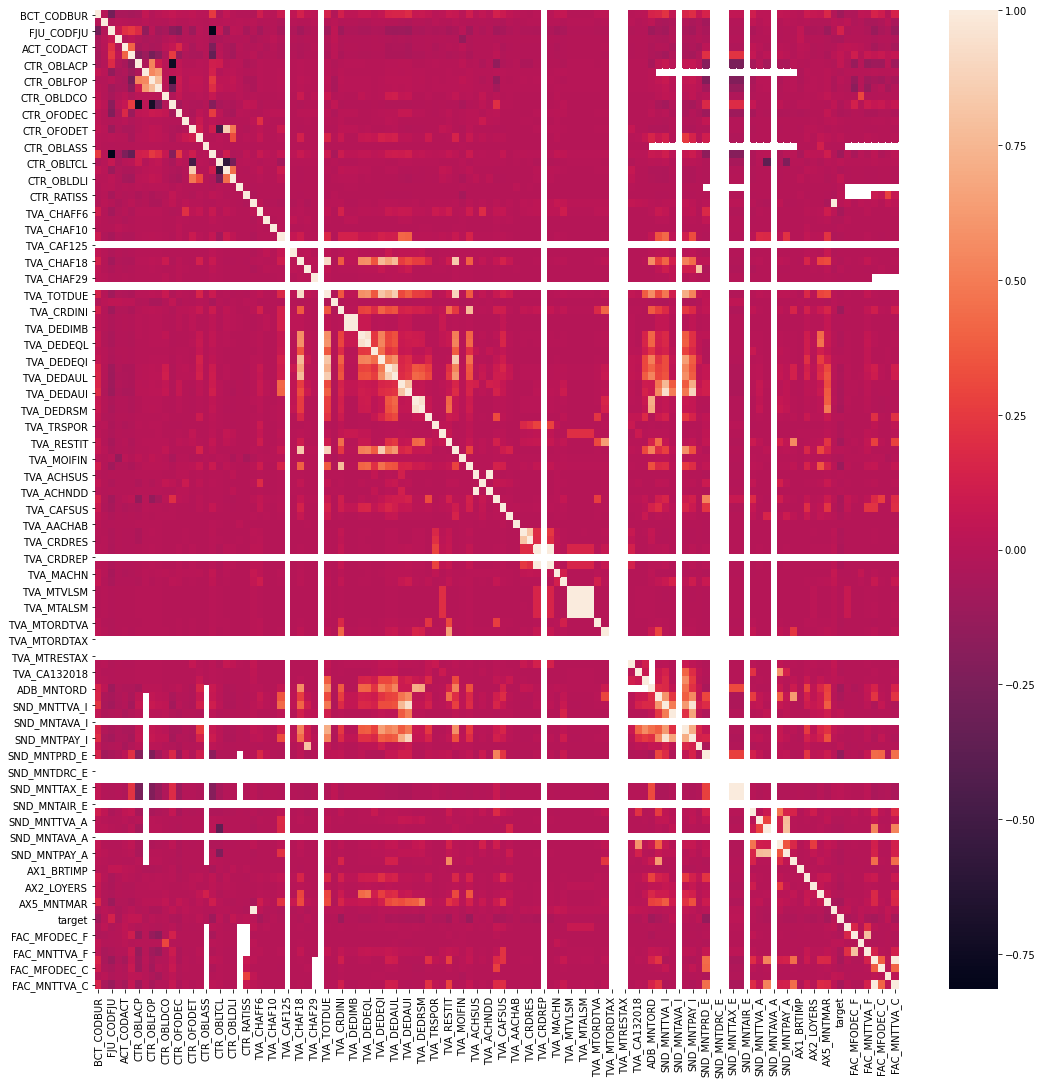

In [9]:
plt.figure(figsize=(18,18))
sns.heatmap(data_fraud.corr())

In [16]:
len(data_fraud['target'].unique())

15620

In [17]:
len(data_fraud['target'])

21295